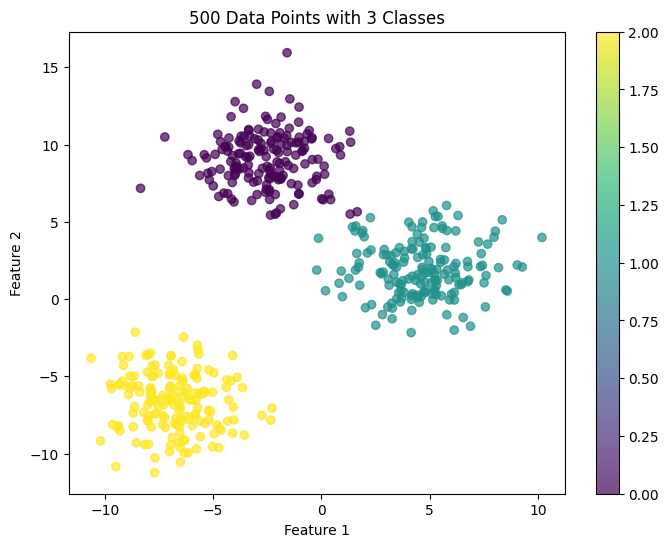

Data shape: (500, 2)
Labels shape: (500,)
Class distribution: [167 167 166]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3, n_features=2,
                  cluster_std=1.8, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('500 Data Points with 3 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")

In [12]:
class ThreeLayerNN:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(input_size, hidden1_size) * 0.1
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.softmax(self.z3)
        return self.a3

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        y_true_onehot = np.eye(y_pred.shape[1])[y_true]
        loss = -np.sum(y_true_onehot * np.log(y_pred + 1e-8)) / m
        return loss

    def backward(self, X, y):
        m = X.shape[0]
        y_true_onehot = np.eye(self.W3.shape[1])[y]

        dz3 = self.a3 - y_true_onehot
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        dz2 = np.dot(dz3, self.W3.T) * self.relu_derivative(self.a2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2, dW3, db3

    def update_parameters(self, dW1, db1, dW2, db2, dW3, db3):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3

    def predict(self, X):
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden1_size = 64
hidden2_size = 32
output_size = 3

model = ThreeLayerNN(input_size, hidden1_size, hidden2_size, output_size)

epochs = 1000
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    train_probs = model.forward(X_train)
    train_loss = model.compute_loss(train_probs, y_train)

    dW1, db1, dW2, db2, dW3, db3 = model.backward(X_train, y_train)
    model.update_parameters(dW1, db1, dW2, db2, dW3, db3)

    train_accuracy = model.accuracy(X_train, y_train)
    test_accuracy = model.accuracy(X_test, y_test)
    test_probs = model.forward(X_test)
    test_loss = model.compute_loss(test_probs, y_test)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}, "
              f"Train Acc = {train_accuracy:.4f}, Test Acc = {test_accuracy:.4f}")

Epoch 0: Train Loss = 1.0628, Test Loss = 1.0022, Train Acc = 0.5525, Test Acc = 0.5400
Epoch 100: Train Loss = 0.0245, Test Loss = 0.0063, Train Acc = 0.9900, Test Acc = 1.0000
Epoch 200: Train Loss = 0.0194, Test Loss = 0.0030, Train Acc = 0.9900, Test Acc = 1.0000
Epoch 300: Train Loss = 0.0169, Test Loss = 0.0022, Train Acc = 0.9900, Test Acc = 1.0000
Epoch 400: Train Loss = 0.0153, Test Loss = 0.0017, Train Acc = 0.9950, Test Acc = 1.0000
Epoch 500: Train Loss = 0.0141, Test Loss = 0.0013, Train Acc = 0.9950, Test Acc = 1.0000
Epoch 600: Train Loss = 0.0132, Test Loss = 0.0011, Train Acc = 0.9950, Test Acc = 1.0000
Epoch 700: Train Loss = 0.0124, Test Loss = 0.0009, Train Acc = 0.9950, Test Acc = 1.0000
Epoch 800: Train Loss = 0.0117, Test Loss = 0.0008, Train Acc = 0.9950, Test Acc = 1.0000
Epoch 900: Train Loss = 0.0111, Test Loss = 0.0007, Train Acc = 0.9950, Test Acc = 1.0000


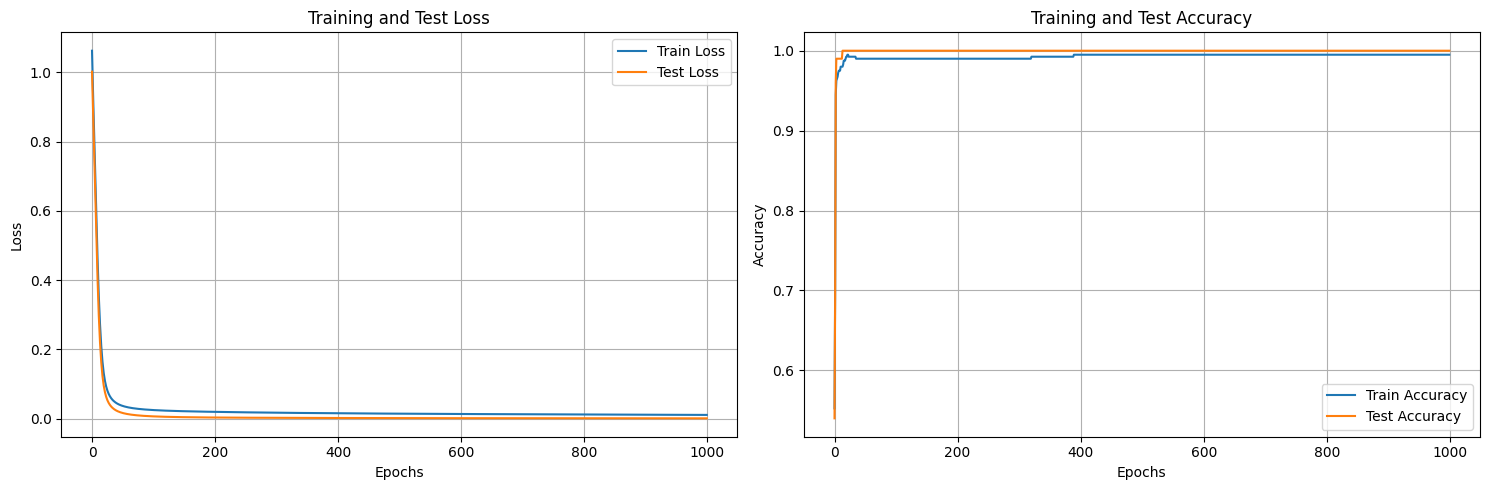

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

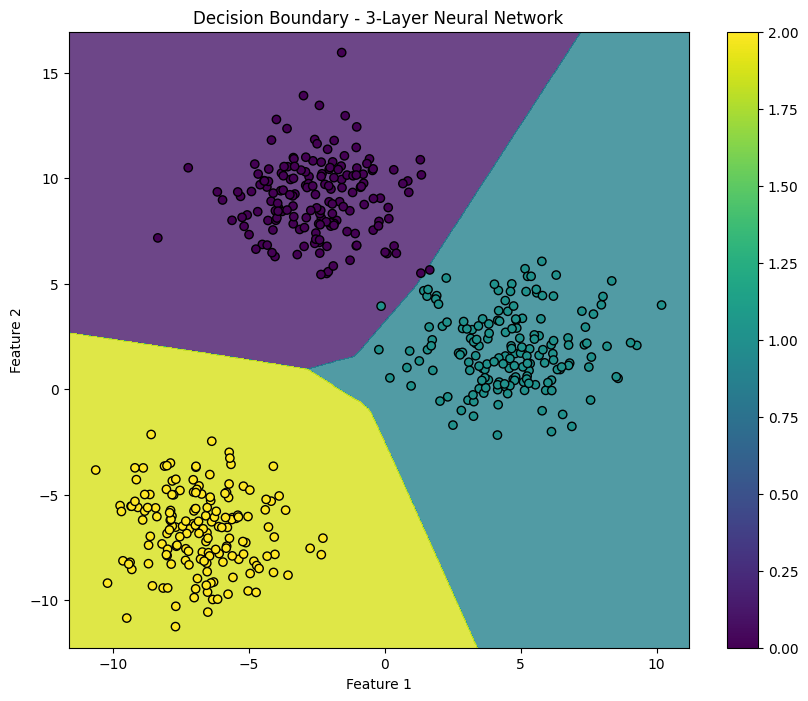

In [15]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap='viridis')
plt.colorbar(scatter)
plt.title('Decision Boundary - 3-Layer Neural Network')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
final_train_acc = model.accuracy(X_train, y_train)
final_test_acc = model.accuracy(X_test, y_test)

print(f"\nFinal Results:")
print(f"Training Accuracy: {final_train_acc:.4f}")
print(f"Test Accuracy: {final_test_acc:.4f}")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Test Loss: {test_losses[-1]:.4f}")


Final Results:
Training Accuracy: 0.9950
Test Accuracy: 1.0000
Training Loss: 0.0106
Test Loss: 0.0007
